# **Handling Multi-Dimensional Data in Python**

### **Step 1: Load the Dataset & Clean the Data**


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# 21BDS0293
# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/econmath.csv"
df = pd.read_csv(url, index_col=0)  # Load and set first column as index

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 1 to 856
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       856 non-null    int64  
 1   work      856 non-null    float64
 2   study     856 non-null    float64
 3   econhs    856 non-null    int64  
 4   colgpa    856 non-null    float64
 5   hsgpa     856 non-null    float64
 6   acteng    814 non-null    float64
 7   actmth    814 non-null    float64
 8   act       814 non-null    float64
 9   mathscr   856 non-null    int64  
 10  male      856 non-null    int64  
 11  calculus  856 non-null    int64  
 12  attexc    856 non-null    int64  
 13  attgood   856 non-null    int64  
 14  fathcoll  856 non-null    int64  
 15  mothcoll  856 non-null    int64  
 16  score     856 non-null    float64
dtypes: float64(8), int64(9)
memory usage: 120.4 KB


,age,work,study,econhs,colgpa,hsgpa,acteng,actmth,act,mathscr,male,calculus,attexc,attgood,fathcoll,mothcoll,score
rownames,,,,,,,,,,,,,,,,,
1,23,15.0,10.0,0,3.4909,3.355,24.0,26.0,27.0,10,1,1,0,0,1,1,84.43
2,23,0.0,22.5,1,2.1000,3.219,23.0,20.0,24.0,9,1,0,0,0,0,1,57.38
3,21,25.0,12.0,0,3.0851,3.306,21.0,24.0,21.0,8,1,1,1,0,0,1,66.39
4,22,30.0,40.0,0,2.6805,3.977,31.0,28.0,31.0,10,0,1,0,1,1,1,81.15
5,22,25.0,15.0,1,3.7454,3.890,28.0,31.0,32.0,8,1,1,0,1,0,1,95.90


### Step 2: Handling Missing Values


In [3]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Fill missing numerical values with mean, categorical values with mode
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

print("Missing values handled!")
df.info()  # Check data types and non-null counts


Missing values in each column:
 age          0
work         0
study        0
econhs       0
colgpa       0
hsgpa        0
acteng      42
actmth      42
act         42
mathscr      0
male         0
calculus     0
attexc       0
attgood      0
fathcoll     0
mothcoll     0
score        0
dtype: int64
Missing values handled!
<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 1 to 856
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       856 non-null    int64  
 1   work      856 non-null    float64
 2   study     856 non-null    float64
 3   econhs    856 non-null    int64  
 4   colgpa    856 non-null    float64
 5   hsgpa     856 non-null    float64
 6   acteng    856 non-null    float64
 7   actmth    856 non-null    float64
 8   act       856 non-null    float64
 9   mathscr   856 non-null    int64  
 10  male      856 non-null    int64  
 11  calculus  856 non-null    int64  
 12  attexc    856 non-null   

## Step 3: Visualizing 1D, 2D, and N-Dimensional Data

### 1D Visualization (Histograms & Boxplots)

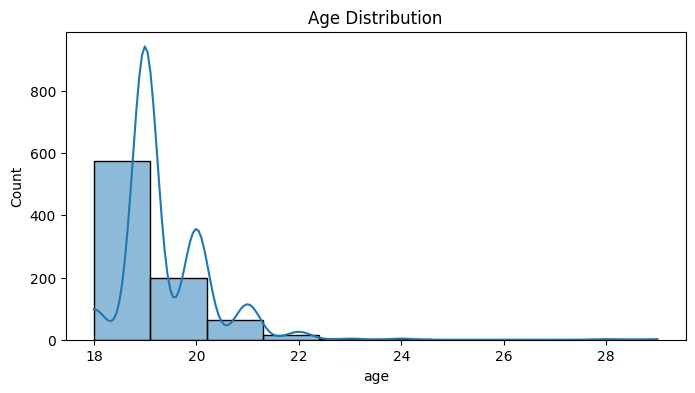

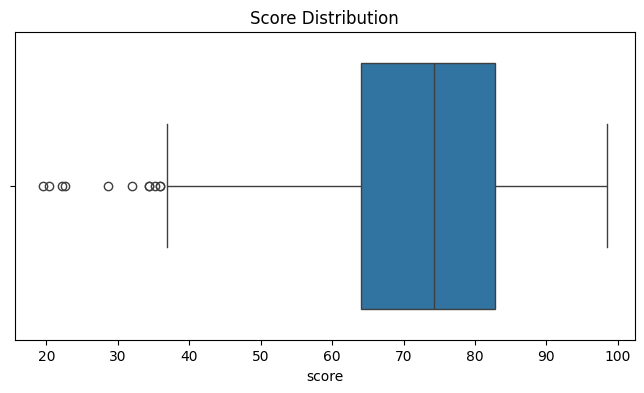

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot for scores
plt.figure(figsize=(8,4))
sns.boxplot(x=df['score'])
plt.title('Score Distribution')
plt.show()


### 2D Visualization (Scatter Plot & Correlation Heatmap)

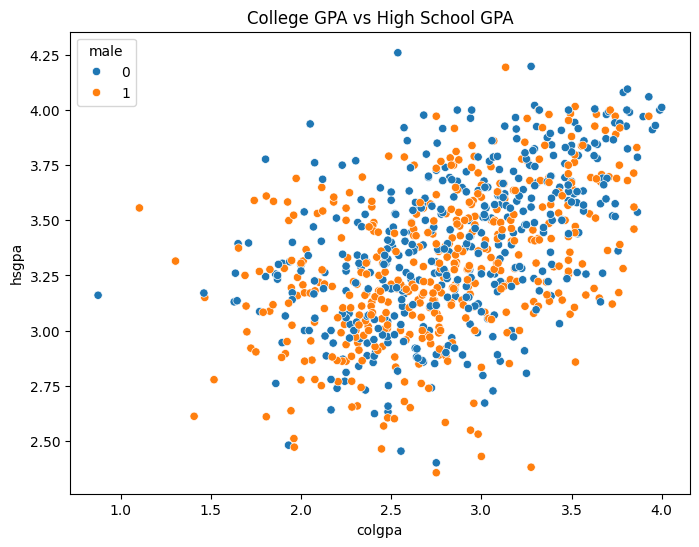

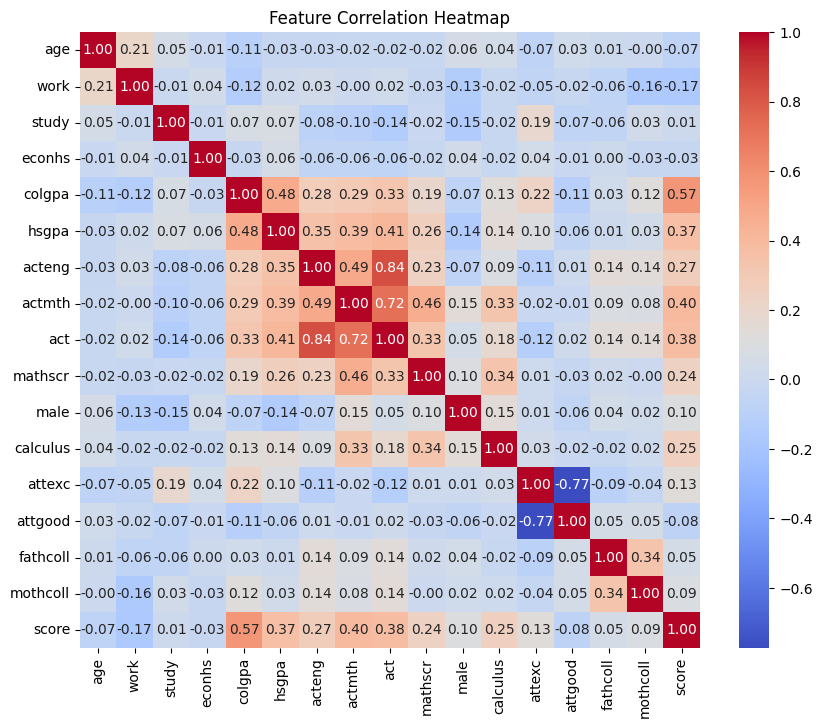

In [5]:
# Scatter plot of colgpa vs hsgpa
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['colgpa'], y=df['hsgpa'], hue=df['male'])
plt.title('College GPA vs High School GPA')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


### N-Dimensional Visualization (Pair Plot)


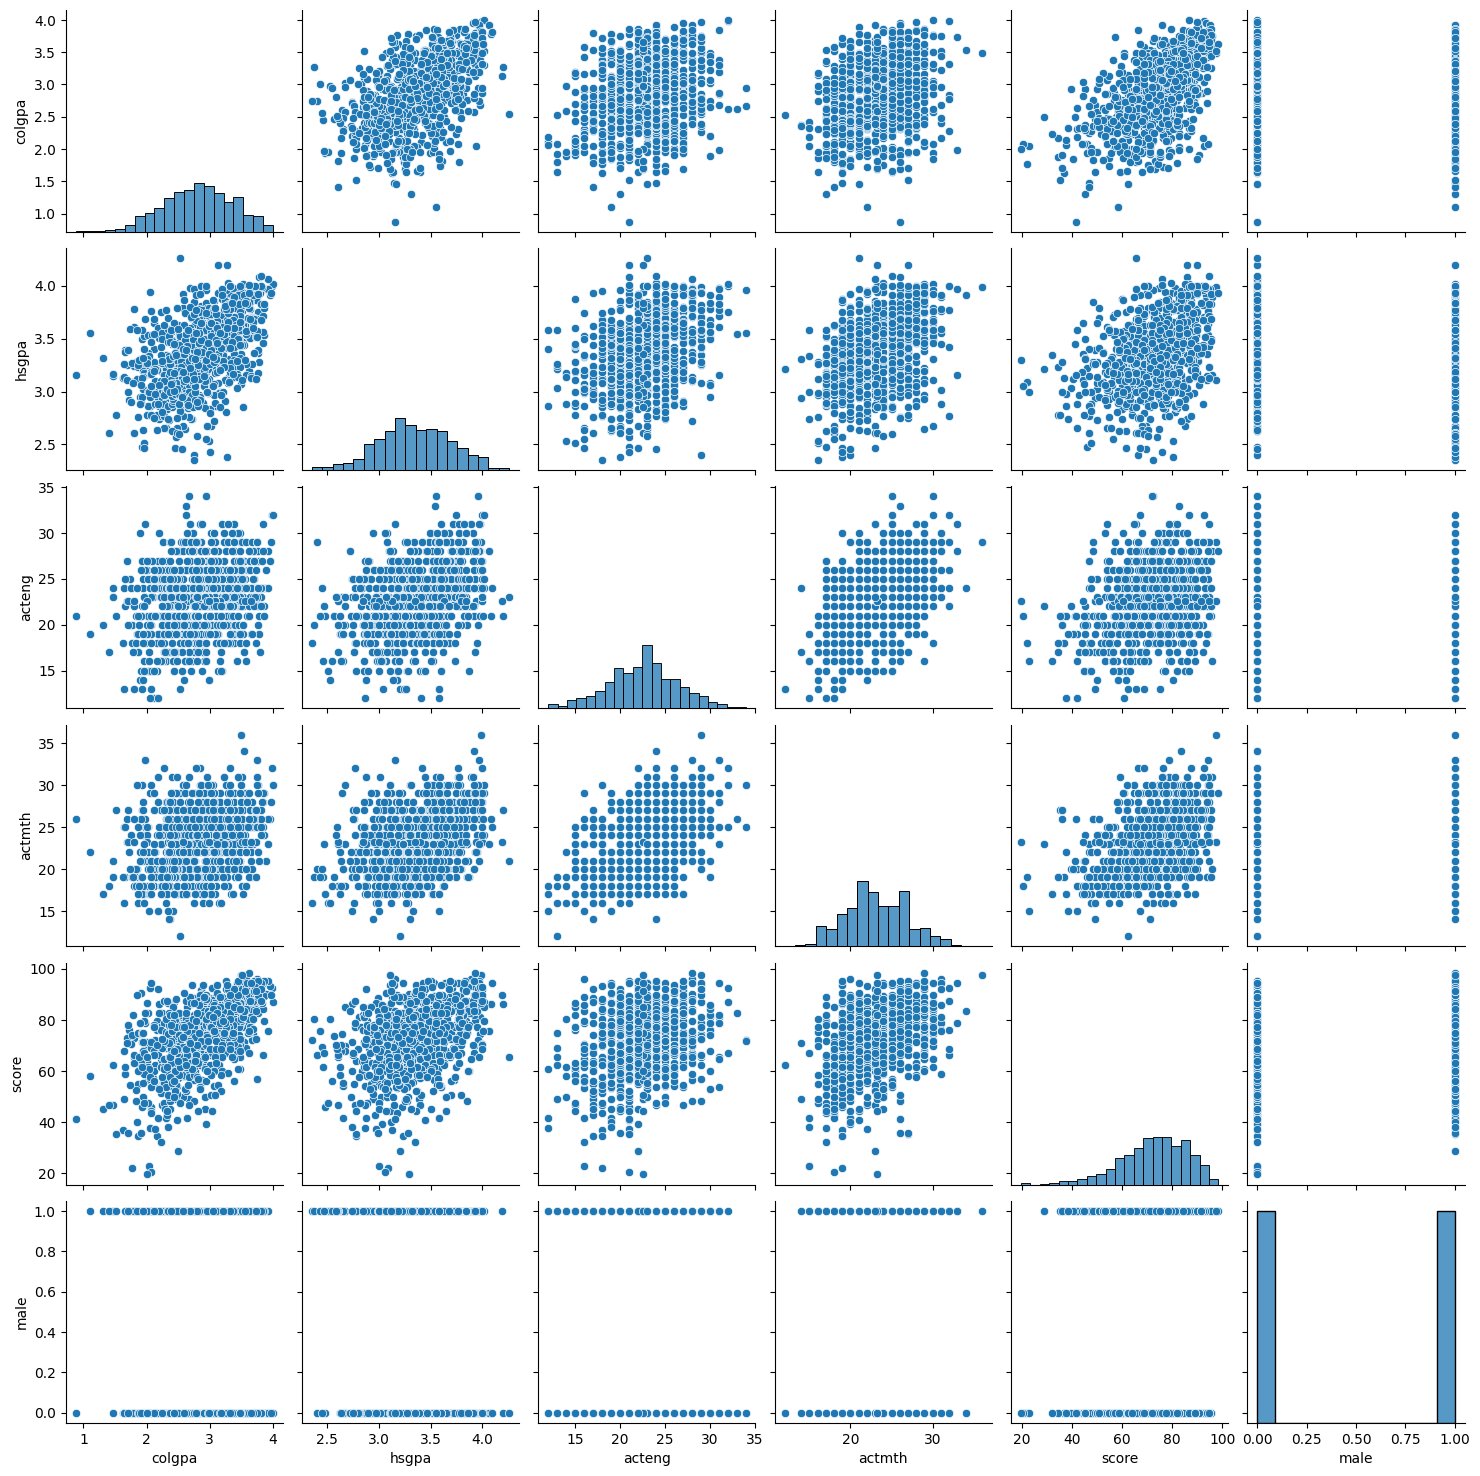

In [6]:
# Pairplot to visualize relationships
sns.pairplot(df[['colgpa', 'hsgpa', 'acteng', 'actmth', 'score', 'male']])
plt.show()

### Dimensionality Reduction

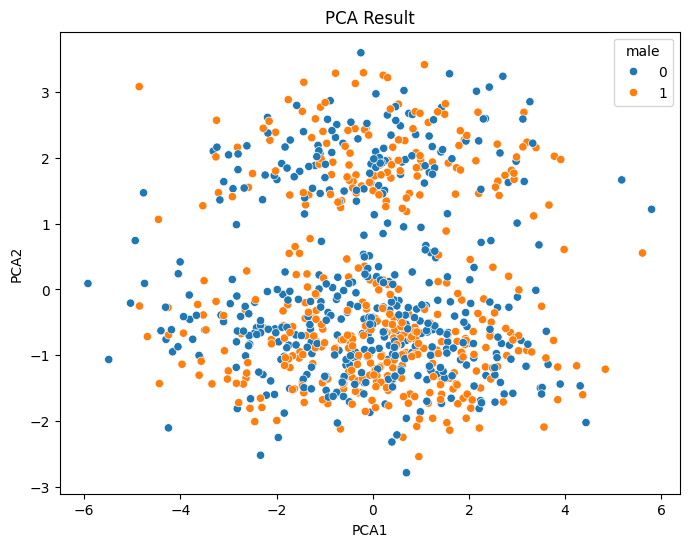

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data before PCA
features = df.select_dtypes(include=[np.number])  # Only numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['male'])
plt.title('PCA Result')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['age', 'work', 'study', 'colgpa', 'hsgpa', 'acteng', 'actmth']]
y = df['score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [9]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-Squared Score: {r2:.4f}')


Mean Squared Error: 106.9406
R-Squared Score: 0.3975
